In [1]:
print("Loading extensions...")

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import simpson
import svgutils
from svgutils.compose import *
# system interaction
import os.path
import time, sys, warnings, re
from tqdm.notebook import tqdm, trange
import importlib
import ipywidgets
from IPython.display import display
# lab brews
from plotParams import *
from quantumCatch import *

def calculateQC(photoSpectrum,ledSpectrum, wavelength, collectingArea = 1e-8):
    # default collectingArea is 1 um^2 so that QC is in photons/um^2/s
    dotProduct = np.multiply(photoSpectrum,ledSpectrum);
    QC = simpson(dotProduct[~np.isnan(dotProduct)],x=wavelength[~np.isnan(dotProduct)]) * collectingArea
    return QC

print("Successfully loaded extensions!")

pBGMenu = ipywidgets.Dropdown(options=['Light', 'Dark'],value='Light',disabled=False, layout=ipywidgets.Layout(width='20%', height='40px'))
pBGLabel = ipywidgets.widgets.Label('Select plotting style', layout=ipywidgets.Layout(width='20%', height='30px'))
pBG = ipywidgets.widgets.VBox([pBGLabel,pBGMenu])
pBG

Loading extensions...
Successfully loaded extensions!


In [2]:
dirLightSources = '/Users/juanangueyra/Library/CloudStorage/GoogleDrive-angueyra@umd.edu/Shared drives/vldImaging/LightCalibration/20241004_incubatorLEDs/'
applyPlotStyle(pBGMenu.value)

getFileList(dirLightSources,'csv')

Plotting style is Light


['Lens_Mauratus1048.csv',
 'Lens_Mzebra136.csv',
 'Water4Vadim.xlsx',
 'coolwhiteLED_KXZM.csv',
 'coolwhiteLED_KXZM.h5',
 'depthlightExptProjections.csv',
 'depthlightExptProjections2.csv',
 'depthlightExptProjections_sidewelling.csv',
 'depthlightExptProjections_sidewelling_v1.csv',
 'depthlightExptProjections_sidewelling_v2.csv',
 'depthlightExptProjections_sidewelling_v3.csv',
 'labLights_BPS2217.csv',
 'labLights_BPS2217.h5',
 'mainIncubatorLED.csv',
 'mainIncubatorLED.h5',
 'naturalwhiteLED_KXZM.csv',
 'rgbLED_KXZM_B.csv',
 'rgbLED_KXZM_G.csv',
 'rgbLED_KXZM_R.csv',
 'rgbLED_KXZM_RGB.csv',
 'uv365_sllHut.csv',
 'uv365_sllHut.h5',
 'uvLED_KXZM.csv',
 'uvLED_KXZM.h5']

### One light source at a time

In [3]:
# fPath = 'coolwhiteLED_KXZM.csv'
# fPath = 'labLights_BPS2217.csv'
# fPath = 'mainIncubatorLED.csv'
# fPath = 'naturalwhiteLED_KXZM.csv'
# fPath = 'rgbLED_KXZM_B.csv'
# fPath = 'rgbLED_KXZM_G.csv'
# fPath = 'rgbLED_KXZM_R.csv'
# fPath = 'rgbLED_KXZM_RGB.csv'
fPath = 'uvLED_KXZM.csv'

lightSource = pd.read_csv(dirLightSources+fPath)
lightSource['subSpectrum'] = lightSource['spectrum']-lightSource['dark']
lightSource['normSpectrum'] = lightSource['subSpectrum']/np.max(lightSource['subSpectrum'])
lightSource

,wavelength,dark,spectrum,subSpectrum,normSpectrum
0,181.112460,15.818793,15.818793,0.000000,0.000000
1,181.485569,27524.700000,27524.700000,0.000000,0.000000
2,181.858655,2189.772931,2205.591724,15.818793,0.000342
3,182.231718,2135.537069,2185.253276,49.716207,0.001075
4,182.604759,2225.930172,2201.072069,-24.858103,-0.000538
...,...,...,...,...,...
2043,867.032456,2641.738448,2610.100862,-31.637586,-0.000684
2044,867.316379,2691.454655,2623.659828,-67.794828,-0.001466
2045,867.600236,2639.478621,2709.533276,70.054655,0.001515
2046,867.884028,2639.478621,2709.533276,70.054655,0.001515


(250.0, 800.0)

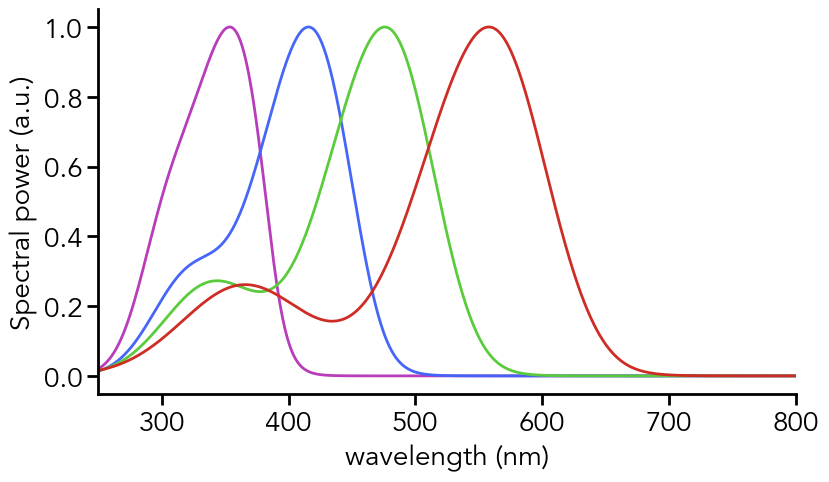

In [4]:
U = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['U'])
S = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['S'])
M = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['M2'])
L = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['L1'])

plotname = ''
fH, axH = plt.subplots(figsize= [9,5])


pH = plt.plot(lightSource['wavelength'], lightSource['normSpectrum'], color='white', linewidth=2, alpha = .99)
pH = plt.plot(lightSource['wavelength'], U, color=zfC['U'], linewidth=2, alpha = .99)
pH = plt.plot(lightSource['wavelength'], S, color=zfC['S'], linewidth=2, alpha = .99)
pH = plt.plot(lightSource['wavelength'], M, color=zfC['M'], linewidth=2, alpha = .99)
pH = plt.plot(lightSource['wavelength'], L, color=zfC['L'], linewidth=2, alpha = .99)
axH.set_xlabel('wavelength (nm)')
axH.set_ylabel('Spectral power (a.u.)')

fontLabels = formatFigureMain(fH, axH, [])

# plt.ylim([-180,180])
plt.xlim([250,800])
# plt.ylim([-15,0])

### Plot for NiCE Application

### Raw curves

##### zebrafish

In [ ]:
U = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['U'])
S = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['S'])
M1 = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['M1'])
M2 = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['M2'])
M3 = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['M3'])
M4 = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['M4'])
L1 = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['L1'])
L2 = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['L2'])

plotname = ''
fH, axH = plt.subplots(figsize= [6,4])
# pH = plt.plot(lightSource['wavelength'], U, color=zfC['U'], linewidth=3, alpha = .99)
# pH = plt.plot(lightSource['wavelength'], S, color=zfC['S'], linewidth=3, alpha = .99)
# pH = plt.plot(lightSource['wavelength'], M1, color=zfC['M'], linewidth=3, alpha = .99)
# pH = plt.plot(lightSource['wavelength'], M2, color=zfC['M'], linewidth=3, alpha = .99)
# pH = plt.plot(lightSource['wavelength'], M3, color=zfC['M'], linewidth=3, alpha = .99)
# pH = plt.plot(lightSource['wavelength'], M4, color=zfC['M'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], L1, color=zfC['L'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], L2, color=zfC['L'], linewidth=3, alpha = .99)
axH.set_xlabel('wavelength (nm)')
axH.set_ylabel('Spectral sensitivity (norm.)')

fontLabels = formatFigureMain(fH, axH, [])

# plt.ylim([-180,180])
plt.xlim([250,800])
# plt.ylim([-15,0])


#### _A. burtoni_

In [ ]:
U = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = abLmax['U'])
S1 = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = abLmax['S1'])
S2 = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = abLmax['S2'])
M1 = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = abLmax['M1'])
M2 = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = abLmax['M2'])
M3 = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = abLmax['M3'])
L = govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = abLmax['L'])

plotname = ''
fH, axH = plt.subplots(figsize= [6,4])
pH = plt.plot(lightSource['wavelength'], U, color=zfC['U'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], S1, color=zfC['S'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], S2, color=zfC['S'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], M1, color=zfC['M'], linewidth=3, alpha = .20)
pH = plt.plot(lightSource['wavelength'], M2, color=zfC['M'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], M3, color=zfC['M'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], L, color=zfC['L'], linewidth=3, alpha = .99)
axH.set_xlabel('wavelength (nm)')
axH.set_ylabel('Spectral sensitivity (norm.)')

fontLabels = formatFigureMain(fH, axH, [])

# plt.ylim([-180,180])
plt.xlim([250,800])
# plt.ylim([-15,0])


### Lens correction

#### zebrafish

(300.0, 800.0)

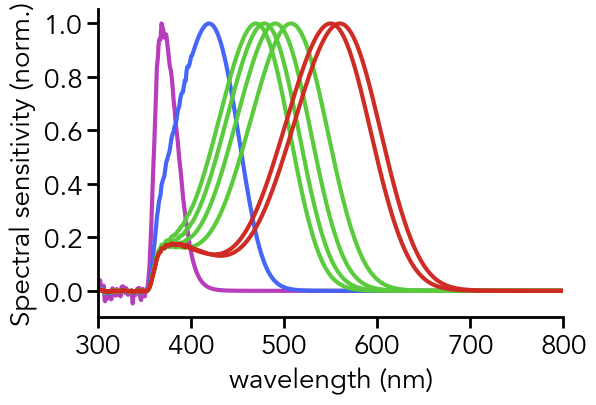

In [7]:
# using the Mzebra lens until I measure one for zebrafish
lensPath = 'Lens_Mzebra136.csv'
# lensPath = 'Lens_Mauratus1048.csv'
lensData = pd.read_csv(dirLightSources+lensPath)
lensData
lensFx = np.interp(lightSource['wavelength'],lensData['wavelength'],lensData['transmission'])
lensFx



U = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['U']))
U = np.divide(U,np.max(U))
S = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['S']))
S = np.divide(S,np.max(S))
M1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['M1']))
M1 = np.divide(M1,np.max(M1))
M2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['M2']))
M2 = np.divide(M2,np.max(M2))
M3 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['M3']))
M3 = np.divide(M3,np.max(M3))
M4 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['M4']))
M4 = np.divide(M4,np.max(M4))
L1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['L1']))
L1 = np.divide(L1,np.max(L1))
L2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = zfLmax['L2']))
L2 = np.divide(L2,np.max(L2))

plotname = ''
fH, axH = plt.subplots(figsize= [6,4])
pH = plt.plot(lightSource['wavelength'], U, color=zfC['U'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], S, color=zfC['S'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], M1, color=zfC['M'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], M2, color=zfC['M'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], M3, color=zfC['M'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], M4, color=zfC['M'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], L1, color=zfC['L'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], L2, color=zfC['L'], linewidth=3, alpha = .99)
axH.set_xlabel('wavelength (nm)')
axH.set_ylabel('Spectral sensitivity (norm.)')

fontLabels = formatFigureMain(fH, axH, [])

# plt.ylim([-180,180])
plt.xlim([300,800])
# plt.ylim([-15,0])

#### _A. burtoni_

In [ ]:
lensPath = 'Lens_Mzebra136.csv'
# lensPath = 'Lens_Mauratus1048.csv'
lensData = pd.read_csv(dirLightSources+lensPath)
lensData
lensFx = np.interp(lightSource['wavelength'],lensData['wavelength'],lensData['transmission'])
lensFx


U = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = abLmax['U']))
U = np.divide(U,np.max(U))
S1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = abLmax['S1']))
S1 = np.divide(S1,np.max(S1))
S2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = abLmax['S2']))
S2 = np.divide(S2,np.max(S2))
M1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = abLmax['M1']))
M1 = np.divide(M1,np.max(M1))
M2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = abLmax['M2']))
M2 = np.divide(M2,np.max(M2))
M3 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = abLmax['M3']))
M3 = np.divide(M3,np.max(M3))
L = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = lightSource['wavelength'], lmax = abLmax['L']))
L = np.divide(L,np.max(L))

plotname = ''
fH, axH = plt.subplots(figsize= [6,4])
pH = plt.plot(lightSource['wavelength'], lensFx, color=zfC['R'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], U, color=zfC['U'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], S1, color=zfC['S'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], S2, color=zfC['S'], linewidth=3, alpha = .99)
# pH = plt.plot(lightSource['wavelength'], M1, color=zfC['M'], linewidth=3, alpha = .20)
pH = plt.plot(lightSource['wavelength'], M2, color=zfC['M'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], M3, color=zfC['M'], linewidth=3, alpha = .99)
pH = plt.plot(lightSource['wavelength'], L, color=zfC['L'], linewidth=3, alpha = .99)
axH.set_xlabel('wavelength (nm)')
axH.set_ylabel('Spectral sensitivity (norm.)')

fontLabels = formatFigureMain(fH, axH, [])

# plt.ylim([-180,180])
plt.xlim([300,800])
# plt.ylim([-15,0])


### all light sources overlay with cone spectral sensitivity

In [5]:
fPathU = 'uv365_sllHut.csv'
fPathV = 'uvLED_KXZM.csv'
fPathB = 'rgbLED_KXZM_B.csv'
fPathG = 'rgbLED_KXZM_G.csv'
fPathR = 'rgbLED_KXZM_R.csv'
# fPath = 'rgbLED_KXZM_RGB.csv'
fPathWC = 'coolwhiteLED_KXZM.csv'
fPathWN = 'naturalwhiteLED_KXZM.csv'
# fPath = 'labLights_BPS2217.csv'
# fPath = 'mainIncubatorLED.csv'

ledU = pd.read_csv(dirLightSources+fPathU)
ledU['subSpectrum'] = ledU['spectrum']-ledU['dark']
ledU['normSpectrum'] = ledU['subSpectrum']/np.max(ledU['subSpectrum'])

ledV = pd.read_csv(dirLightSources+fPathV)
ledV['subSpectrum'] = ledV['spectrum']-ledV['dark']
ledV['normSpectrum'] = ledV['subSpectrum']/np.max(ledV['subSpectrum'])

ledB = pd.read_csv(dirLightSources+fPathB)
ledB['subSpectrum'] = ledB['spectrum']-ledB['dark']
ledB['normSpectrum'] = ledB['subSpectrum']/np.max(ledB['subSpectrum'])

ledG = pd.read_csv(dirLightSources+fPathG)
ledG['subSpectrum'] = ledG['spectrum']-ledG['dark']
ledG['normSpectrum'] = ledG['subSpectrum']/np.max(ledG['subSpectrum'])

ledR = pd.read_csv(dirLightSources+fPathR)
ledR['subSpectrum'] = ledR['spectrum']-ledR['dark']
ledR['normSpectrum'] = ledR['subSpectrum']/np.max(ledR['subSpectrum'])

ledWC = pd.read_csv(dirLightSources+fPathWC)
ledWC['subSpectrum'] = ledWC['spectrum']-ledWC['dark']
ledWC['normSpectrum'] = ledWC['subSpectrum']/np.max(ledWC['subSpectrum'])

ledWN = pd.read_csv(dirLightSources+fPathWN)
ledWN['subSpectrum'] = ledWN['spectrum']-ledWN['dark']
ledWN['normSpectrum'] = ledWN['subSpectrum']/np.max(ledWN['subSpectrum'])


(300.0, 800.0)

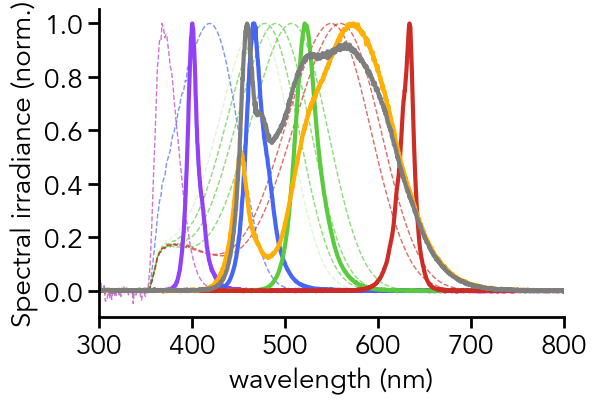

In [12]:
def sigmoid(x, x0):
    y = (1 / (1 + np.exp(-0.2*(x-x0))))
    return (y)

wnCutOff = sigmoid(ledU['wavelength'],490)

plotname = ''
fH, axH = plt.subplots(figsize= [6,4])
# pH = plt.plot(ledU['wavelength'], U, color=zfC['U'], linewidth=2, linestyle= 'dashed',alpha = .69)
# pH = plt.plot(ledU['wavelength'], S1, color=zfC['S'], linewidth=2, linestyle= 'dashed',alpha = .69)
# pH = plt.plot(ledU['wavelength'], S2, color=zfC['S'], linewidth=2, linestyle= 'dashed',alpha = .69)
# # pH = plt.plot(ledU['wavelength'], M1, color=zfC['M'], linewidth=1, linestyle= 'dashed',alpha = .19)
# pH = plt.plot(ledU['wavelength'], M2, color=zfC['M'], linewidth=2, linestyle= 'dashed',alpha = .69)
# pH = plt.plot(ledU['wavelength'], M3, color=zfC['M'], linewidth=2, linestyle= 'dashed',alpha = .69)
# pH = plt.plot(ledU['wavelength'], L, color=zfC['L'], linewidth=2, linestyle= 'dashed',alpha = .69)


pH = plt.plot(ledU['wavelength'], U, color=zfC['U'], linewidth=1, linestyle= 'dashed',alpha = .69)
pH = plt.plot(ledU['wavelength'], S, color=zfC['S'], linewidth=1, linestyle= 'dashed',alpha = .69)
pH = plt.plot(ledU['wavelength'], M1, color=zfC['M'], linewidth=1, linestyle= 'dashed',alpha = .19)
pH = plt.plot(ledU['wavelength'], M2, color=zfC['M'], linewidth=1, linestyle= 'dashed',alpha = .69)
pH = plt.plot(ledU['wavelength'], M3, color=zfC['M'], linewidth=1, linestyle= 'dashed',alpha = .69)
pH = plt.plot(ledU['wavelength'], M4, color=zfC['M'], linewidth=1, linestyle= 'dashed',alpha = .69)
pH = plt.plot(ledU['wavelength'], L1, color=zfC['L'], linewidth=1, linestyle= 'dashed',alpha = .69)
pH = plt.plot(ledU['wavelength'], L2, color=zfC['L'], linewidth=1, linestyle= 'dashed',alpha = .69)


# pH = plt.plot(ledU['wavelength'], ledU['normSpectrum'], color=zfC['U'], linewidth=3, alpha = .99)
pH = plt.plot(ledU['wavelength'], ledV['normSpectrum'], color='#923FF9', linewidth=3, alpha = .99)
pH = plt.plot(ledB['wavelength'], ledB['normSpectrum'], color=zfC['S'], linewidth=3, alpha = .99)
pH = plt.plot(ledG['wavelength'], ledG['normSpectrum'], color=zfC['M'], linewidth=3, alpha = .99)
pH = plt.plot(ledR['wavelength'], ledR['normSpectrum'], color=zfC['L'], linewidth=3, alpha = .99)
# pH = plt.plot(ledWN['wavelength'], np.multiply(ledWN['normSpectrum'],wnCutOff), color=zfC['H'], linewidth=3, alpha = .99)
pH = plt.plot(ledWN['wavelength'], ledWN['normSpectrum'], color=zfC['H'], linewidth=3, alpha = .99)
pH = plt.plot(ledWC['wavelength'], ledWC['normSpectrum'], color=zfC['R'], linewidth=3, alpha = .99)


axH.set_xlabel('wavelength (nm)')
axH.set_ylabel('Spectral irradiance (norm.)')

fontLabels = formatFigureMain(fH, axH, [])

# plt.ylim([-180,180])
plt.xlim([300,800])
# plt.ylim([-15,0])

### Quantum Catches

In [ ]:
collectingArea = 1 / 1e8 # in cm^2

leds = ['ledU','ledV','ledR']
photoreceptors = ['U']
QC = {}
# for led in leds:
#     QC[led] = {}
#     for photo in photoreceptors:
#         QC[led][photo] = calculateQC(U,ledU['normSpectrum'],ledU['wavelength'])
QC['ledU'] = {}
QC['ledU']['U'] = calculateQC(U,ledU['normSpectrum'],ledU['wavelength'])
QC['ledU']['S1'] = calculateQC(S1,ledU['normSpectrum'],ledU['wavelength'])
QC['ledU']['S2'] = calculateQC(S2,ledU['normSpectrum'],ledU['wavelength'])
QC['ledU']['M1'] = calculateQC(M1,ledU['normSpectrum'],ledU['wavelength'])
QC['ledU']['M2'] = calculateQC(M2,ledU['normSpectrum'],ledU['wavelength'])
QC['ledU']['M3'] = calculateQC(M3,ledU['normSpectrum'],ledU['wavelength'])
QC['ledU']['L'] = calculateQC(L,ledU['normSpectrum'],ledU['wavelength'])

QC['ledV'] = {}
QC['ledV']['U'] = calculateQC(U,ledV['normSpectrum'],ledV['wavelength'])
QC['ledV']['S1'] = calculateQC(S1,ledV['normSpectrum'],ledV['wavelength'])
QC['ledV']['S2'] = calculateQC(S2,ledV['normSpectrum'],ledV['wavelength'])
QC['ledV']['M1'] = calculateQC(M1,ledV['normSpectrum'],ledV['wavelength'])
QC['ledV']['M2'] = calculateQC(M2,ledV['normSpectrum'],ledV['wavelength'])
QC['ledV']['M3'] = calculateQC(M3,ledV['normSpectrum'],ledV['wavelength'])
QC['ledV']['L'] = calculateQC(L,ledV['normSpectrum'],ledV['wavelength'])

QC['ledB'] = {}
QC['ledB']['U'] = calculateQC(U,ledB['normSpectrum'],ledB['wavelength'])
QC['ledB']['S1'] = calculateQC(S1,ledB['normSpectrum'],ledB['wavelength'])
QC['ledB']['S2'] = calculateQC(S2,ledB['normSpectrum'],ledB['wavelength'])
QC['ledB']['M1'] = calculateQC(M1,ledB['normSpectrum'],ledB['wavelength'])
QC['ledB']['M2'] = calculateQC(M2,ledB['normSpectrum'],ledB['wavelength'])
QC['ledB']['M3'] = calculateQC(M3,ledB['normSpectrum'],ledB['wavelength'])
QC['ledB']['L'] = calculateQC(L,ledB['normSpectrum'],ledB['wavelength'])

QC['ledG'] = {}
QC['ledG']['U'] = calculateQC(U,ledG['normSpectrum'],ledG['wavelength'])
QC['ledG']['S1'] = calculateQC(S1,ledG['normSpectrum'],ledG['wavelength'])
QC['ledG']['S2'] = calculateQC(S2,ledG['normSpectrum'],ledG['wavelength'])
QC['ledG']['M1'] = calculateQC(M1,ledG['normSpectrum'],ledG['wavelength'])
QC['ledG']['M2'] = calculateQC(M2,ledG['normSpectrum'],ledG['wavelength'])
QC['ledG']['M3'] = calculateQC(M3,ledG['normSpectrum'],ledG['wavelength'])
QC['ledG']['L'] = calculateQC(L,ledG['normSpectrum'],ledG['wavelength'])

QC['ledR'] = {}
QC['ledR']['U'] = calculateQC(U,ledR['normSpectrum'],ledR['wavelength'])
QC['ledR']['S1'] = calculateQC(S1,ledR['normSpectrum'],ledR['wavelength'])
QC['ledR']['S2'] = calculateQC(S2,ledR['normSpectrum'],ledR['wavelength'])
QC['ledR']['M1'] = calculateQC(M1,ledR['normSpectrum'],ledR['wavelength'])
QC['ledR']['M2'] = calculateQC(M2,ledR['normSpectrum'],ledR['wavelength'])
QC['ledR']['M3'] = calculateQC(M3,ledR['normSpectrum'],ledR['wavelength'])
QC['ledR']['L'] = calculateQC(L,ledR['normSpectrum'],ledR['wavelength'])

QC['ledWN'] = {}
QC['ledWN']['U'] = calculateQC(U,ledWN['normSpectrum'],ledWN['wavelength'])
QC['ledWN']['S1'] = calculateQC(S1,ledWN['normSpectrum'],ledWN['wavelength'])
QC['ledWN']['S2'] = calculateQC(S2,ledWN['normSpectrum'],ledWN['wavelength'])
QC['ledWN']['M1'] = calculateQC(M1,ledWN['normSpectrum'],ledWN['wavelength'])
QC['ledWN']['M2'] = calculateQC(M2,ledWN['normSpectrum'],ledWN['wavelength'])
QC['ledWN']['M3'] = calculateQC(M3,ledWN['normSpectrum'],ledWN['wavelength'])
QC['ledWN']['L'] = calculateQC(L,ledWN['normSpectrum'],ledWN['wavelength'])

QC

In [ ]:
photoreceptors = ['U','S1','S2','M1','M2','M3','L']
pr = ['U','S','S','M','M','M','L']
xLabels = ['Opn1sw1','Opn1sw2a','Opn1sw2b','Opn1mwB','Opn1mwAb','Opn1mwAa','Opn1lw']
barW = 0.8; #len(sQC)+2; # bar width
barD = 1; # bar distance
barP = 0; # position in x-axis
barStep = 1; # distance between bars
barPos = []; #array to save bar positions

plotname = ''
fH, axH = plt.subplots(6,1,figsize= [6,3*6], sharex=True)

i=0
prI = 0
for photo in photoreceptors:
    i = i+barStep
    pH = axH[0].bar([i/barD], QC['ledU'][photo], width=barW, color=zfC[pr[prI]])
    barPos = np.append(barPos,(i/barD))
    prI = prI + 1 

fontLabels = formatFigureMain(fH, axH[0], [])

for label in axH[0].get_xticklabels():
    label.set_horizontalalignment('right')
axH[0].xaxis.set_tick_params(rotation=45)
axH[0].set_xticks(barPos)
axH[0].set_xticklabels((xLabels))
# axH[0].set_ylabel('Quantum catch \n (photons/s)')

# axH.set_ylim([0,40000])
axH[0].ticklabel_format(axis='y', style='sci', scilimits=(0, 3))
axH[0].yaxis.get_offset_text().set_fontsize(14)


barPos = []; #array to save bar positions
i=0
prI = 0
for photo in photoreceptors:
    i = i+barStep
    pH = axH[1].bar([i/barD], QC['ledV'][photo], width=barW, color=zfC[pr[prI]])
    barPos = np.append(barPos,(i/barD))
    prI = prI + 1 

fontLabels = formatFigureMain(fH, axH[1], [])

for label in axH[1].get_xticklabels():
    label.set_horizontalalignment('right')
axH[1].xaxis.set_tick_params(rotation=45)
axH[1].set_xticks(barPos)
axH[1].set_xticklabels((xLabels))
# axH[1].set_ylabel('Quantum catch \n (photons/s)')

# axH.set_ylim([0,40000])
axH[1].ticklabel_format(axis='y', style='sci', scilimits=(0, 3))
axH[1].yaxis.get_offset_text().set_fontsize(14)



barPos = []; #array to save bar positions
i=0
prI = 0
for photo in photoreceptors:
    i = i+barStep
    pH = axH[2].bar([i/barD], QC['ledB'][photo], width=barW, color=zfC[pr[prI]])
    barPos = np.append(barPos,(i/barD))
    prI = prI + 1 

fontLabels = formatFigureMain(fH, axH[2], [])

for label in axH[2].get_xticklabels():
    label.set_horizontalalignment('right')
axH[2].xaxis.set_tick_params(rotation=45)
axH[2].set_xticks(barPos)
axH[2].set_xticklabels((xLabels))
# axH[2].set_ylabel('Quantum catch \n (photons/s)')

# axH.set_ylim([0,40000])
axH[2].ticklabel_format(axis='y', style='sci', scilimits=(0, 3))
axH[2].yaxis.get_offset_text().set_fontsize(14)

barPos = []; #array to save bar positions
i=0
prI = 0
for photo in photoreceptors:
    i = i+barStep
    pH = axH[3].bar([i/barD], QC['ledG'][photo], width=barW, color=zfC[pr[prI]])
    barPos = np.append(barPos,(i/barD))
    prI = prI + 1 

fontLabels = formatFigureMain(fH, axH[3], [])

for label in axH[3].get_xticklabels():
    label.set_horizontalalignment('right')
axH[3].xaxis.set_tick_params(rotation=45)
axH[3].set_xticks(barPos)
axH[3].set_xticklabels((xLabels))
axH[3].set_ylabel('Quantum catch \n (photons/s)')

# axH.set_ylim([0,40000])
axH[3].ticklabel_format(axis='y', style='sci', scilimits=(0, 3))
axH[3].yaxis.get_offset_text().set_fontsize(14)

barPos = []; #array to save bar positions
i=0
prI = 0
for photo in photoreceptors:
    i = i+barStep
    pH = axH[4].bar([i/barD], QC['ledWN'][photo], width=barW, color=zfC[pr[prI]])
    barPos = np.append(barPos,(i/barD))
    prI = prI + 1 

fontLabels = formatFigureMain(fH, axH[4], [])

for label in axH[4].get_xticklabels():
    label.set_horizontalalignment('right')
axH[4].xaxis.set_tick_params(rotation=45)
axH[4].set_xticks(barPos)
axH[4].set_xticklabels((xLabels))
axH[4].set_ylabel('Quantum catch \n (photons/s)')

# axH.set_ylim([0,40000])
axH[4].ticklabel_format(axis='y', style='sci', scilimits=(0, 3))
axH[4].yaxis.get_offset_text().set_fontsize(14)

barPos = []; #array to save bar positions
i=0
prI = 0
for photo in photoreceptors:
    i = i+barStep
    pH = axH[5].bar([i/barD], QC['ledR'][photo], width=barW, color=zfC[pr[prI]])
    barPos = np.append(barPos,(i/barD))
    prI = prI + 1 

fontLabels = formatFigureMain(fH, axH[5], [])

for label in axH[5].get_xticklabels():
    label.set_horizontalalignment('right')
axH[5].xaxis.set_tick_params(rotation=45)
axH[5].set_xticks(barPos)
axH[5].set_xticklabels((xLabels))
axH[5].set_ylabel('Quantum catch \n (photons/s)')

# axH.set_ylim([0,40000])
axH[5].ticklabel_format(axis='y', style='sci', scilimits=(0, 3))
axH[5].yaxis.get_offset_text().set_fontsize(14)


### chlorophyl and depth

In [ ]:
fPathChl = 'depthlightExptProjections.csv'
fPathChl = 'depthlightExptProjections_sidewelling.csv'
fPathChl = 'depthlightExptProjections_sidewelling_v1.csv' # has 3 m data
# fPathChl = 'depthlightExptProjections_sidewelling_v2.csv'
# fPathChl = 'depthlightExptProjections_sidewelling_v3.csv'


chl = pd.read_csv(dirLightSources+fPathChl)
np.unique(chl['z'])


In [ ]:

plt.subplots_adjust(bottom=0.8)


yDivider = 1e10
plotname = ''
fH, axH = plt.subplots(2,1,figsize= [6,10], sharey=False)


pH = axH[0].plot(ledU['wavelength'], np.multiply(U,3), color=zfC['U'], linewidth=1, alpha = .19)
pH = axH[0].plot(ledU['wavelength'], np.multiply(S1,3), color=zfC['S'], linewidth=1, alpha = .19)
# pH = axH[0].plot(ledU['wavelength'], np.multiply(S2,3), color=zfC['S'], linewidth=1, alpha = .19)
# pH = axH[0].plot(ledU['wavelength'], np.multiply(M1,3), color=zfC['M'], linewidth=1, alpha = .19)
# pH = axH[0].plot(ledU['wavelength'], np.multiply(M2,3), color=zfC['M'], linewidth=1, alpha = .19)
# pH = axH[0].plot(ledU['wavelength'], np.multiply(M3,3), color=zfC['M'], linewidth=1, alpha = .19)
pH = axH[0].plot(ledU['wavelength'], np.multiply(L,3), color=zfC['L'], linewidth=1, alpha = .19)

currC = 0.5
currZ = 1
pH = axH[0].plot(chl['wv'][(chl['z']==currZ) & (chl['chl']==currC)],np.divide(chl['I'][(chl['z']==currZ) & (chl['chl']==currC)],yDivider), color='#000000', linewidth=3, alpha = .99)
# currZ = 5
currC = 7
currZ = 1
pH = axH[0].plot(chl['wv'][(chl['z']==currZ) & (chl['chl']==currC)],np.divide(chl['I'][(chl['z']==currZ) & (chl['chl']==currC)],yDivider), color=zfC['S'], linewidth=3, alpha = .99)

# axH[0].set_xlabel('wavelength (nm)')
axH[0].set_ylabel('Irradiance (photons/cm$\mathregular{^{2}}$/s)')


axH[0].set_xlim([300,800])
axH[0].set_ylim([-0.1,3.5])

axH[0].set_yticks([0,1,2,3])
yLabels = axH[0].get_yticklabels()
yLabels[0] = yLabels[0].get_text() + '× $\mathregular{10^{10}}$'
yLabels[1] = yLabels[1].get_text() + '× $\mathregular{10^{10}}$'
yLabels[2] = yLabels[2].get_text() + '× $\mathregular{10^{10}}$'
yLabels[3] = yLabels[3].get_text() + '× $\mathregular{10^{10}}$'
axH[0].set_yticklabels(yLabels)
# axH[0].set_title('chl-a = 1 µg')
fontLabels = formatFigureMain(fH, axH[0], [])


pH = axH[1].plot(ledU['wavelength'], np.multiply(U,3), color=zfC['U'], linewidth=1, alpha = .19)
pH = axH[1].plot(ledU['wavelength'], np.multiply(S1,3), color=zfC['S'], linewidth=1, alpha = .19)
# pH = axH[1].plot(ledU['wavelength'], np.multiply(S2,3), color=zfC['S'], linewidth=1, alpha = .19)
# pH = axH[1].plot(ledU['wavelength'], np.multiply(M1,3), color=zfC['M'], linewidth=1, alpha = .19)
# pH = axH[1].plot(ledU['wavelength'], np.multiply(M2,3), color=zfC['M'], linewidth=1, alpha = .19)
# pH = axH[1].plot(ledU['wavelength'], np.multiply(M3,3), color=zfC['M'], linewidth=1, alpha = .19)
pH = axH[1].plot(ledU['wavelength'], np.multiply(L,3), color=zfC['L'], linewidth=1, alpha = .19)

currC = 7
currZ = 1
pH1 = axH[1].plot(chl['wv'][(chl['z']==currZ) & (chl['chl']==currC)],np.divide(chl['I'][(chl['z']==currZ) & (chl['chl']==currC)],yDivider), color='#000000', linewidth=3, alpha = .99)
currZ = 5
pH2 = axH[1].plot(chl['wv'][(chl['z']==currZ) & (chl['chl']==currC)],np.divide(chl['I'][(chl['z']==currZ) & (chl['chl']==currC)],yDivider), color=zfC['S'], linewidth=3, alpha = .99)

axH[1].set_xlabel('wavelength (nm)')
axH[1].set_ylabel('Irradiance (photons/cm$\mathregular{^{2}}$/s)')

axH[1].set_xlim([300,800])
axH[1].set_ylim([-0.1,3.5])

axH[1].set_yticks([0,1,2,3])
yLabels = axH[1].get_yticklabels()
yLabels[0] = yLabels[0].get_text() + '× $\mathregular{10^{10}}$'
yLabels[1] = yLabels[1].get_text() + '× $\mathregular{10^{10}}$'
yLabels[2] = yLabels[2].get_text() + '× $\mathregular{10^{10}}$'
yLabels[3] = yLabels[3].get_text() + '× $\mathregular{10^{10}}$'
axH[1].set_yticklabels(yLabels)

# axH[1].legend([pH1,pH2],['1m','5m'])
# axH[1].legend(['1m','5m'])
# axH[1].set_title('chl-a = 7 µg')

fontLabels = formatFigureMain(fH, axH[1], [])


In [ ]:

plt.subplots_adjust(bottom=0.8)


yDivider = 1e10
plotname = ''
fH, axH = plt.subplots(figsize= [6,5])


# pH = axH.plot(ledU['wavelength'], np.multiply(U,3), color=zfC['U'], linewidth=1, alpha = .19)
# pH = axH.plot(ledU['wavelength'], np.multiply(S1,3), color=zfC['S'], linewidth=1, alpha = .19)
# pH = axH.plot(ledU['wavelength'], np.multiply(S2,3), color=zfC['S'], linewidth=1, alpha = .19)
# pH = axH.plot(ledU['wavelength'], np.multiply(M1,3), color=zfC['M'], linewidth=1, alpha = .19)
# pH = axH.plot(ledU['wavelength'], np.multiply(M2,3), color=zfC['M'], linewidth=1, alpha = .19)
# pH = axH.plot(ledU['wavelength'], np.multiply(M3,3), color=zfC['M'], linewidth=1, alpha = .19)
# pH = axH.plot(ledU['wavelength'], np.multiply(L,3), color=zfC['L'], linewidth=1, alpha = .19)

currC = 0.5
currZ = 1
pH = axH.plot(chl['wv'][(chl['z']==currZ) & (chl['chl']==currC)],np.divide(chl['I'][(chl['z']==currZ) & (chl['chl']==currC)],yDivider), color=lighten_color('#1A494E',0.9), linewidth=3, alpha = .99)
currC = 7
currZ = 1
pH = axH.plot(chl['wv'][(chl['z']==currZ) & (chl['chl']==currC)],np.divide(chl['I'][(chl['z']==currZ) & (chl['chl']==currC)],yDivider), color=lighten_color('#112F4B',0.9), linewidth=3, alpha = .99)
currC = 7
currZ = 3 # 5
pH = axH.plot(chl['wv'][(chl['z']==currZ) & (chl['chl']==currC)],np.divide(chl['I'][(chl['z']==currZ) & (chl['chl']==currC)],yDivider), color=lighten_color('#171644',0.9), linewidth=3, alpha = .99)

axH.set_xlabel('wavelength (nm)')
axH.set_ylabel('Irradiance (photons/cm$\mathregular{^{2}}$/s)')

axH.set_xlim([300,800])
axH.set_ylim([-0.1,3.5])

axH.set_yticks([0,1,2,3])
yLabels = axH.get_yticklabels()
yLabels[0] = yLabels[0].get_text() + '× $\mathregular{10^{10}}$'
yLabels[1] = yLabels[1].get_text() + '× $\mathregular{10^{10}}$'
yLabels[2] = yLabels[2].get_text() + '× $\mathregular{10^{10}}$'
yLabels[3] = yLabels[3].get_text() + '× $\mathregular{10^{10}}$'
axH.set_yticklabels(yLabels)
# axH.set_title('chl-a = 1 µg')
fontLabels = formatFigureMain(fH, axH, [])



### Calculating quantum catches in the different environments

In [ ]:
currC = 0.5
currZ = 1
env1_wv = chl['wv'][(chl['z']==currZ) & (chl['chl']==currC)]
env1_I = chl['I'][(chl['z']==currZ) & (chl['chl']==currC)]

lensPath = 'Lens_Mzebra136.csv'
# lensPath = 'Lens_Mauratus1048.csv'
lensData = pd.read_csv(dirLightSources+lensPath)
lensFx = np.interp(env1_wv,lensData['wavelength'],lensData['transmission'])




U = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['U']))
U = np.divide(U,np.max(U))
S1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['S1']))
S1 = np.divide(S1,np.max(S1))
S2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['S2']))
S2 = np.divide(S2,np.max(S2))
M1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['M1']))
M1 = np.divide(M1,np.max(M1))
M2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['M2']))
M2 = np.divide(M2,np.max(M2))
M3 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['M3']))
M3 = np.divide(M3,np.max(M3))
L = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['L']))
L = np.divide(L,np.max(L))

sQC = {}
sQC['U'] = calculateQC(U,env1_I,env1_wv)
sQC['S1'] = calculateQC(S1,env1_I,env1_wv)
sQC['S2'] = calculateQC(S2,env1_I,env1_wv)
sQC['M1'] = calculateQC(M1,env1_I,env1_wv)
sQC['M2'] = calculateQC(M2,env1_I,env1_wv)
sQC['M3'] = calculateQC(M3,env1_I,env1_wv)
sQC['L'] = calculateQC(L,env1_I,env1_wv)


pr = ['U','S','S','M','M','M','L']
xLabels = ['Opn1sw1','Opn1sw2a','Opn1sw2b','Opn1mwB','Opn1mwAb','Opn1mwAa','Opn1lw']
barW = 0.8; #len(sQC)+2; # bar width
barD = 1; # bar distance
barP = 0; # position in x-axis
barStep = 1; # distance between bars
barPos = []; #array to save bar positions

plotname = ''
fH, axH = plt.subplots(figsize= [6,3])

i=0
prI = 0
for s in sQC.keys():
    i = i+barStep
    pH = plt.bar([i/barD], sQC[s], width=barW, color=zfC[pr[prI]])
    barPos = np.append(barPos,(i/barD))
    prI = prI + 1 

fontLabels = formatFigureMain(fH, axH, [])

for label in axH.get_xticklabels():
    label.set_horizontalalignment('right')
axH.xaxis.set_tick_params(rotation=45)
axH.set_xticks(barPos)
axH.set_xticklabels((xLabels))
axH.set_ylabel('Quantum catch \n (photons/s)')

axH.set_ylim([0,40000])
axH.ticklabel_format(axis='y', style='sci', scilimits=(0, 3))
axH.yaxis.get_offset_text().set_fontsize(14)


In [ ]:
currC = 0.5
currZ = 5
env1_wv = chl['wv'][(chl['z']==currZ) & (chl['chl']==currC)]
env1_I = chl['I'][(chl['z']==currZ) & (chl['chl']==currC)]

lensPath = 'Lens_Mzebra136.csv'
# lensPath = 'Lens_Mauratus1048.csv'
lensData = pd.read_csv(dirLightSources+lensPath)
lensFx = np.interp(env1_wv,lensData['wavelength'],lensData['transmission'])


U = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['U']))
U = np.divide(U,np.max(U))
S1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['S1']))
S1 = np.divide(S1,np.max(S1))
S2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['S2']))
S2 = np.divide(S2,np.max(S2))
M1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['M1']))
M1 = np.divide(M1,np.max(M1))
M2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['M2']))
M2 = np.divide(M2,np.max(M2))
M3 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['M3']))
M3 = np.divide(M3,np.max(M3))
L = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['L']))
L = np.divide(L,np.max(L))

QC_U = np.multiply(U,env1_I)
QC_S1 = np.multiply(S1,env1_I)
QC_S2 = np.multiply(S2,env1_I)
QC_M1 = np.multiply(M1,env1_I)
QC_M2 = np.multiply(M2,env1_I)
QC_M3 = np.multiply(M3,env1_I)
QC_L = np.multiply(L,env1_I)


# plotname = ''
# fH, axH = plt.subplots(figsize= [6,4])
# pH = plt.plot(env1_wv, env1_I, color=zfC['R'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_U, color=zfC['U'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_S1, color=zfC['S'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_S2, color=zfC['S'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_M1, color=zfC['M'], linewidth=1, alpha = .29)
# pH = plt.plot(env1_wv, QC_M2, color=zfC['M'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_M3, color=zfC['M'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_L, color=zfC['L'], linewidth=1, alpha = .99)
# axH.set_xlabel('wavelength (nm)')
# axH.set_ylabel('Spectral irradiance (norm.)')
# fontLabels = formatFigureMain(fH, axH, [])
# plt.xlim([300,800])

collectingArea = 1 / 1e8 # in cm^2

sQC = {}
sQC['U'] = simpson(QC_U[~np.isnan(QC_U)],x=env1_wv[~np.isnan(QC_U)]) * collectingArea
sQC['S1'] = simpson(QC_S1[~np.isnan(QC_S1)],x=env1_wv[~np.isnan(QC_S1)]) * collectingArea
sQC['S2'] = simpson(QC_S2[~np.isnan(QC_S2)],x=env1_wv[~np.isnan(QC_S2)]) * collectingArea
sQC['M1'] = simpson(QC_M1[~np.isnan(QC_M1)],x=env1_wv[~np.isnan(QC_M1)]) * collectingArea
sQC['M2'] = simpson(QC_M2[~np.isnan(QC_M2)],x=env1_wv[~np.isnan(QC_M2)]) * collectingArea
sQC['M3'] = simpson(QC_M3[~np.isnan(QC_M3)],x=env1_wv[~np.isnan(QC_M3)]) * collectingArea
sQC['L'] = simpson(QC_L[~np.isnan(QC_L)],x=env1_wv[~np.isnan(QC_L)]) * collectingArea


pr = ['U','S','S','M','M','M','L']
xLabels = ['Opn1sw1','Opn1sw2a','Opn1sw2b','Opn1mwB','Opn1mwAb','Opn1mwAa','Opn1lw']
barW = 0.8; #len(sQC)+2; # bar width
barD = 1; # bar distance
barP = 0; # position in x-axis
barStep = 1; # distance between bars
barPos = []; #array to save bar positions

plotname = ''
fH, axH = plt.subplots(figsize= [6,3])

i=0
prI = 0
for s in sQC.keys():
    i = i+barStep
    pH = plt.bar([i/barD], sQC[s], width=barW, color=zfC[pr[prI]])
    barPos = np.append(barPos,(i/barD))
    prI = prI + 1 

fontLabels = formatFigureMain(fH, axH, [])

for label in axH.get_xticklabels():
    label.set_horizontalalignment('right')
axH.xaxis.set_tick_params(rotation=45)
axH.set_xticks(barPos)
axH.set_xticklabels((xLabels))
axH.set_ylabel('Quantum catch \n (photons/s)')

axH.set_ylim([0,5000])
axH.ticklabel_format(axis='y', style='sci', scilimits=(0, 3))
axH.yaxis.get_offset_text().set_fontsize(14)


In [ ]:
currC = 7
currZ = 1
env1_wv = chl['wv'][(chl['z']==currZ) & (chl['chl']==currC)]
env1_I = chl['I'][(chl['z']==currZ) & (chl['chl']==currC)]

lensPath = 'Lens_Mzebra136.csv'
# lensPath = 'Lens_Mauratus1048.csv'
lensData = pd.read_csv(dirLightSources+lensPath)
lensFx = np.interp(env1_wv,lensData['wavelength'],lensData['transmission'])


U = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['U']))
U = np.divide(U,np.max(U))
S1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['S1']))
S1 = np.divide(S1,np.max(S1))
S2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['S2']))
S2 = np.divide(S2,np.max(S2))
M1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['M1']))
M1 = np.divide(M1,np.max(M1))
M2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['M2']))
M2 = np.divide(M2,np.max(M2))
M3 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['M3']))
M3 = np.divide(M3,np.max(M3))
L = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['L']))
L = np.divide(L,np.max(L))

QC2_U = np.multiply(U,env1_I)
QC2_S1 = np.multiply(S1,env1_I)
QC2_S2 = np.multiply(S2,env1_I)
QC2_M1 = np.multiply(M1,env1_I)
QC2_M2 = np.multiply(M2,env1_I)
QC2_M3 = np.multiply(M3,env1_I)
QC2_L = np.multiply(L,env1_I)


# plotname = ''
# fH, axH = plt.subplots(figsize= [6,4])
# pH = plt.plot(env1_wv, env1_I, color=zfC['R'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_U, color=zfC['U'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_S1, color=zfC['S'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_S2, color=zfC['S'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_M1, color=zfC['M'], linewidth=1, alpha = .29)
# pH = plt.plot(env1_wv, QC_M2, color=zfC['M'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_M3, color=zfC['M'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_L, color=zfC['L'], linewidth=1, alpha = .99)
# axH.set_xlabel('wavelength (nm)')
# axH.set_ylabel('Spectral irradiance (norm.)')
# fontLabels = formatFigureMain(fH, axH, [])
# plt.xlim([300,800])

collectingArea = 1 / 1e8 # in cm^2

sQC = {}
sQC['U'] = simpson(QC_U[~np.isnan(QC_U)],x=env1_wv[~np.isnan(QC2_U)]) * collectingArea
sQC['S1'] = simpson(QC_S1[~np.isnan(QC_S1)],x=env1_wv[~np.isnan(QC2_S1)]) * collectingArea
sQC['S2'] = simpson(QC_S2[~np.isnan(QC_S2)],x=env1_wv[~np.isnan(QC2_S2)]) * collectingArea
sQC['M1'] = simpson(QC_M1[~np.isnan(QC_M1)],x=env1_wv[~np.isnan(QC2_M1)]) * collectingArea
sQC['M2'] = simpson(QC_M2[~np.isnan(QC_M2)],x=env1_wv[~np.isnan(QC2_M2)]) * collectingArea
sQC['M3'] = simpson(QC_M3[~np.isnan(QC_M3)],x=env1_wv[~np.isnan(QC2_M3)]) * collectingArea
sQC['L'] = simpson(QC_L[~np.isnan(QC_L)],x=env1_wv[~np.isnan(QC2_L)]) * collectingArea


pr = ['U','S','S','M','M','M','L']
xLabels = ['Opn1sw1','Opn1sw2a','Opn1sw2b','Opn1mwB','Opn1mwAb','Opn1mwAa','Opn1lw']
barW = 0.8; #len(sQC)+2; # bar width
barD = 1; # bar distance
barP = 0; # position in x-axis
barStep = 1; # distance between bars
barPos = []; #array to save bar positions

plotname = ''
fH, axH = plt.subplots(figsize= [6,3])

i=0
prI = 0
for s in sQC.keys():
    i = i+barStep
    pH = plt.bar([i/barD], sQC[s], width=barW, color=zfC[pr[prI]])
    barPos = np.append(barPos,(i/barD))
    prI = prI + 1 

fontLabels = formatFigureMain(fH, axH, [])

for label in axH.get_xticklabels():
    label.set_horizontalalignment('right')
axH.xaxis.set_tick_params(rotation=45)
axH.set_xticks(barPos)
axH.set_xticklabels((xLabels))
axH.set_ylabel('Quantum catch \n (photons/s)')

axH.set_ylim([0,40000])
axH.ticklabel_format(axis='y', style='sci', scilimits=(0, 3))
axH.yaxis.get_offset_text().set_fontsize(14)


In [ ]:
currC = 7
currZ = 5
env1_wv = chl['wv'][(chl['z']==currZ) & (chl['chl']==currC)]
env1_I = chl['I'][(chl['z']==currZ) & (chl['chl']==currC)]

lensPath = 'Lens_Mzebra136.csv'
# lensPath = 'Lens_Mauratus1048.csv'
lensData = pd.read_csv(dirLightSources+lensPath)
lensFx = np.interp(env1_wv,lensData['wavelength'],lensData['transmission'])


U = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['U']))
U = np.divide(U,np.max(U))
S1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['S1']))
S1 = np.divide(S1,np.max(S1))
S2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['S2']))
S2 = np.divide(S2,np.max(S2))
M1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['M1']))
M1 = np.divide(M1,np.max(M1))
M2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['M2']))
M2 = np.divide(M2,np.max(M2))
M3 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['M3']))
M3 = np.divide(M3,np.max(M3))
L = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['L']))
L = np.divide(L,np.max(L))

QC_U = np.multiply(U,env1_I)
QC_S1 = np.multiply(S1,env1_I)
QC_S2 = np.multiply(S2,env1_I)
QC_M1 = np.multiply(M1,env1_I)
QC_M2 = np.multiply(M2,env1_I)
QC_M3 = np.multiply(M3,env1_I)
QC_L = np.multiply(L,env1_I)


# plotname = ''
# fH, axH = plt.subplots(figsize= [6,4])
# pH = plt.plot(env1_wv, env1_I, color=zfC['R'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_U, color=zfC['U'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_S1, color=zfC['S'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_S2, color=zfC['S'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_M1, color=zfC['M'], linewidth=1, alpha = .29)
# pH = plt.plot(env1_wv, QC_M2, color=zfC['M'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_M3, color=zfC['M'], linewidth=1, alpha = .99)
# pH = plt.plot(env1_wv, QC_L, color=zfC['L'], linewidth=1, alpha = .99)
# axH.set_xlabel('wavelength (nm)')
# axH.set_ylabel('Spectral irradiance (norm.)')
# fontLabels = formatFigureMain(fH, axH, [])
# plt.xlim([300,800])

collectingArea = 1 / 1e8 # in cm^2

sQC = {}
sQC['U'] = simpson(QC_U[~np.isnan(QC_U)],x=env1_wv[~np.isnan(QC_U)]) * collectingArea
sQC['S1'] = simpson(QC_S1[~np.isnan(QC_S1)],x=env1_wv[~np.isnan(QC_S1)]) * collectingArea
sQC['S2'] = simpson(QC_S2[~np.isnan(QC_S2)],x=env1_wv[~np.isnan(QC_S2)]) * collectingArea
sQC['M1'] = simpson(QC_M1[~np.isnan(QC_M1)],x=env1_wv[~np.isnan(QC_M1)]) * collectingArea
sQC['M2'] = simpson(QC_M2[~np.isnan(QC_M2)],x=env1_wv[~np.isnan(QC_M2)]) * collectingArea
sQC['M3'] = simpson(QC_M3[~np.isnan(QC_M3)],x=env1_wv[~np.isnan(QC_M3)]) * collectingArea
sQC['L'] = simpson(QC_L[~np.isnan(QC_L)],x=env1_wv[~np.isnan(QC_L)]) * collectingArea


pr = ['U','S','S','M','M','M','L']
xLabels = ['Opn1sw1','Opn1sw2a','Opn1sw2b','Opn1mwB','Opn1mwAb','Opn1mwAa','Opn1lw']
barW = 0.8; #len(sQC)+2; # bar width
barD = 1; # bar distance
barP = 0; # position in x-axis
barStep = 1; # distance between bars
barPos = []; #array to save bar positions

plotname = ''
fH, axH = plt.subplots(figsize= [6,3])

i=0
prI = 0
for s in sQC.keys():
    i = i+barStep
    pH = plt.bar([i/barD], sQC[s], width=barW, color=zfC[pr[prI]])
    barPos = np.append(barPos,(i/barD))
    prI = prI + 1 

fontLabels = formatFigureMain(fH, axH, [])

for label in axH.get_xticklabels():
    label.set_horizontalalignment('right')
axH.xaxis.set_tick_params(rotation=45)
axH.set_xticks(barPos)
axH.set_xticklabels((xLabels))
axH.set_ylabel('Quantum catch \n (photons/s)')

axH.set_ylim([0,40000])
axH.ticklabel_format(axis='y', style='sci', scilimits=(0, 3))
axH.yaxis.get_offset_text().set_fontsize(14)


#### Ratios of QC (_A. burtoni_)

In [ ]:

currC = 0.5
currZ = 1
env1_wv = chl['wv'][(chl['z']==currZ) & (chl['chl']==currC)]
env1_I = chl['I'][(chl['z']==currZ) & (chl['chl']==currC)]

currC = 7
currZ = 1
env2_wv = chl['wv'][(chl['z']==currZ) & (chl['chl']==currC)]
env2_I = chl['I'][(chl['z']==currZ) & (chl['chl']==currC)]

currC = 7
currZ = 3
env3_wv = chl['wv'][(chl['z']==currZ) & (chl['chl']==currC)]
env3_I = chl['I'][(chl['z']==currZ) & (chl['chl']==currC)]

lensPath = 'Lens_Mzebra136.csv'
# lensPath = 'Lens_Mauratus1048.csv'
lensData = pd.read_csv(dirLightSources+lensPath)
lensFx = np.interp(env1_wv,lensData['wavelength'],lensData['transmission'])

U = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['U']))
U = np.divide(U,np.max(U))
S1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['S1']))
S1 = np.divide(S1,np.max(S1))
S2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['S2']))
S2 = np.divide(S2,np.max(S2))
M1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['M1']))
M1 = np.divide(M1,np.max(M1))
M2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['M2']))
M2 = np.divide(M2,np.max(M2))
M3 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['M3']))
M3 = np.divide(M3,np.max(M3))
L = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = abLmax['L']))
L = np.divide(L,np.max(L))

sQC = {}
sQC['U'] = calculateQC(U,env1_I,env1_wv)
sQC['S1'] = calculateQC(S1,env1_I,env1_wv)
sQC['S2'] = calculateQC(S2,env1_I,env1_wv)
sQC['M1'] = calculateQC(M1,env1_I,env1_wv)
sQC['M2'] = calculateQC(M2,env1_I,env1_wv)
sQC['M3'] = calculateQC(M3,env1_I,env1_wv)
sQC['L'] = calculateQC(L,env1_I,env1_wv)


lensPath = 'Lens_Mzebra136.csv'
# lensPath = 'Lens_Mauratus1048.csv'
lensData = pd.read_csv(dirLightSources+lensPath)
lensFx = np.interp(env2_wv,lensData['wavelength'],lensData['transmission'])


U = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env2_wv, lmax = abLmax['U']))
U = np.divide(U,np.max(U))
S1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env2_wv, lmax = abLmax['S1']))
S1 = np.divide(S1,np.max(S1))
S2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env2_wv, lmax = abLmax['S2']))
S2 = np.divide(S2,np.max(S2))
M1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env2_wv, lmax = abLmax['M1']))
M1 = np.divide(M1,np.max(M1))
M2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env2_wv, lmax = abLmax['M2']))
M2 = np.divide(M2,np.max(M2))
M3 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env2_wv, lmax = abLmax['M3']))
M3 = np.divide(M3,np.max(M3))
L = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env2_wv, lmax = abLmax['L']))
L = np.divide(L,np.max(L))

sQC2 = {}
sQC2['U'] = calculateQC(U,env2_I,env2_wv)
sQC2['S1'] = calculateQC(S1,env2_I,env2_wv)
sQC2['S2'] = calculateQC(S2,env2_I,env2_wv)
sQC2['M1'] = calculateQC(M1,env2_I,env2_wv)
sQC2['M2'] = calculateQC(M2,env2_I,env2_wv)
sQC2['M3'] = calculateQC(M3,env2_I,env2_wv)
sQC2['L'] = calculateQC(L,env2_I,env2_wv)

U = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env3_wv, lmax = abLmax['U']))
U = np.divide(U,np.max(U))
S1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env3_wv, lmax = abLmax['S1']))
S1 = np.divide(S1,np.max(S1))
S2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env3_wv, lmax = abLmax['S2']))
S2 = np.divide(S2,np.max(S2))
M1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env3_wv, lmax = abLmax['M1']))
M1 = np.divide(M1,np.max(M1))
M2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env3_wv, lmax = abLmax['M2']))
M2 = np.divide(M2,np.max(M2))
M3 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env3_wv, lmax = abLmax['M3']))
M3 = np.divide(M3,np.max(M3))
L = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env3_wv, lmax = abLmax['L']))
L = np.divide(L,np.max(L))

sQC3 = {}
sQC3['U'] = calculateQC(U,env3_I,env3_wv)
sQC3['S1'] = calculateQC(S1,env3_I,env3_wv)
sQC3['S2'] = calculateQC(S2,env3_I,env3_wv)
sQC3['M1'] = calculateQC(M1,env3_I,env3_wv)
sQC3['M2'] = calculateQC(M2,env3_I,env3_wv)
sQC3['M3'] = calculateQC(M3,env3_I,env3_wv)
sQC3['L'] = calculateQC(L,env3_I,env3_wv)

pr = ['U','S','S','M','M','M','L']
xLabels = ['Opn1sw1','Opn1sw2a','Opn1sw2b','Opn1mwB','Opn1mwAb','Opn1mwAa','Opn1lw']
barW = 0.8; #len(sQC)+2; # bar width
barD = 1; # bar distance
barP = 0; # position in x-axis
barStep = 1; # distance between bars
barPos = []; #array to save bar positions

plotname = ''
fH, axH = plt.subplots(figsize= [6,3])

i=0
prI = 0
for s in sQC.keys():
    i = i+barStep
    pH = plt.bar([i/barD], sQC[s]-sQC2[s], width=barW, color=zfC[pr[prI]])
    barPos = np.append(barPos,(i/barD))
    prI = prI + 1 

fontLabels = formatFigureMain(fH, axH, [])

for label in axH.get_xticklabels():
    label.set_horizontalalignment('right')
axH.xaxis.set_tick_params(rotation=45)
axH.set_xticks(barPos)
axH.set_xticklabels((xLabels))
axH.set_ylabel('Quantum catch difference \n chl-a low / high')

# axH.set_ylim([0,40000])
axH.ticklabel_format(axis='y', style='sci', scilimits=(-2, 100))
axH.yaxis.get_offset_text().set_fontsize(14)


In [ ]:
# geneLabels = ['0.5 µg/L \n 1 m','7 µg/L \n 1 m','7 µg/L \n 3 m']
geneLabels = ['0.5\n1','7\n1','7\n3']
pr = ['U','S','S','M','M','M','L']
xLabels = ['Opn1sw1','Opn1sw2a','Opn1sw2b','Opn1mwB','Opn1mwAb','Opn1mwAa','Opn1lw']

plotname = ''
fH, axH = plt.subplots(figsize= [10,7])

nGenes = 3 # this is number of environments
barW = nGenes+2; # bar width (inverse)
barD = nGenes+1; # bar distance whitin 1 opsin subtype
barP = -nGenes+1; # position in x-axis
barStep = 0.85; # distance between photoreceptor groups
barPos = []; #array to save bar positions
geneLabel = []

yDivider = 1e-3
j=barP
for q in [sQC,sQC2,sQC3]:
    i=0
    j=j+1
    prI = 0
    for s in q.keys():
        i = i+barStep
        pH = plt.bar([i+j/barD], np.multiply(q[s],yDivider), width=1/barW, color=zfC[pr[prI]])
        barPos = np.append(barPos,(i+j/barD))
        prI = prI + 1



fontLabels = formatFigureMain(fH, axH, [])

for label in axH.get_xticklabels():
    label.set_horizontalalignment('center')
axH.xaxis.set_tick_params(rotation=00)
axH.set_xticks(np.sort(barPos))
axH.set_xticklabels((geneLabels) * len(pr))
axH.set_ylabel('Quantum catch (photons/s)')

axH.set_ylim([0,30])
axH.ticklabel_format(axis='y', style='sci', scilimits=(-2, 100))
axH.yaxis.get_offset_text().set_fontsize(14)

axH.set_yticks([0,10,20,30])
yLabels = axH.get_yticklabels()
# yLabels[0] = yLabels[0].get_text() + '× $\mathregular{10^{3}}$';
yLabels[1] = yLabels[1].get_text() + ' × $\mathregular{10^{3}}$';
yLabels[2] = yLabels[2].get_text() + ' × $\mathregular{10^{3}}$';
yLabels[3] = yLabels[3].get_text() + ' × $\mathregular{10^{3}}$';
axH.set_yticklabels(yLabels)

savePath = '/Users/juanangueyra/Library/CloudStorage/Box-Box/00AngueyraBox/Applications/2025_NSFKavli/Figures/resources/'
plt.savefig(savePath + "QC_Abur.svg", transparent=True, format="svg", bbox_inches = "tight")

In [ ]:
geneLabels = ['0.5\n1','7\n1','7\n3']
pr = ['U']

plotname = ''
fH, axH = plt.subplots(figsize= [10,7])

nGenes = 3 # this is number of environments
barW = nGenes+2; # bar width (inverse)
barD = nGenes+1; # bar distance whitin 1 opsin subtype
barP = -nGenes+1; # position in x-axis
barStep = 0.85; # distance between photoreceptor groups
barPos = []; #array to save bar positions
geneLabel = []

yDivider = 1e-3
j=barP
for q in [sQC,sQC2,sQC3]:
    i=0
    j=j+1
    prI = 0
    for s in ['U']:
        i = i+barStep
        pH = plt.bar([i+j/barD], np.multiply(q[s],yDivider), width=1/barW, color=zfC[pr[prI]])
        barPos = np.append(barPos,(i+j/barD))
        prI = prI + 1



fontLabels = formatFigureMain(fH, axH, [])

for label in axH.get_xticklabels():
    label.set_horizontalalignment('center')
axH.xaxis.set_tick_params(rotation=90)
axH.set_xticks(np.sort(barPos))
axH.set_xticklabels((geneLabels) * len(pr))
axH.set_ylabel('Quantum catch (photons/s)')

axH.set_ylim([0,3])
axH.ticklabel_format(axis='y', style='sci', scilimits=(-2, 100))
axH.yaxis.get_offset_text().set_fontsize(14)

axH.set_yticks([0,1,2,3])
yLabels = axH.get_yticklabels()
# yLabels[0] = yLabels[0].get_text() + '× $\mathregular{10^{3}}$';
yLabels[1] = yLabels[1].get_text() + ' × $\mathregular{10^{3}}$';
yLabels[2] = yLabels[2].get_text() + ' × $\mathregular{10^{3}}$';
yLabels[3] = yLabels[3].get_text() + ' × $\mathregular{10^{3}}$';
axH.set_yticklabels(yLabels)

#### Ratios of QC (zebrafish)

In [ ]:
lensFx = np.interp(env1_wv,lensData['wavelength'],lensData['transmission'])

zU = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = zfLmax['U']))
zU = np.divide(zU,np.max(zU))
zS = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = zfLmax['S']))
zS = np.divide(zS,np.max(zS))
zM1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = zfLmax['M1']))
zM1 = np.divide(zM1,np.max(zM1))
zM2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = zfLmax['M2']))
zM2 = np.divide(zM2,np.max(zM2))
zM3 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = zfLmax['M3']))
zM3 = np.divide(zM3,np.max(zM3))
zM4 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = zfLmax['M4']))
zM4 = np.divide(zM4,np.max(zM4))
zL1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = zfLmax['L1']))
zL1 = np.divide(zL1,np.max(zL1))
zL2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env1_wv, lmax = zfLmax['L2']))
zL2 = np.divide(zL2,np.max(zL2))

sQC = {}
sQC['U'] = calculateQC(zU,env1_I,env1_wv)
sQC['S'] = calculateQC(zS,env1_I,env1_wv)
sQC['M1'] = calculateQC(zM1,env1_I,env1_wv)
sQC['M2'] = calculateQC(zM2,env1_I,env1_wv)
sQC['M3'] = calculateQC(zM3,env1_I,env1_wv)
sQC['M4'] = calculateQC(zM4,env1_I,env1_wv)
sQC['L1'] = calculateQC(zL1,env1_I,env1_wv)
sQC['L2'] = calculateQC(zL2,env1_I,env1_wv)


lensFx = np.interp(env2_wv,lensData['wavelength'],lensData['transmission'])

zU = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env2_wv, lmax = zfLmax['U']))
zU = np.divide(zU,np.max(zU))
zS = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env2_wv, lmax = zfLmax['S']))
zS = np.divide(zS,np.max(zS))
zM1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env2_wv, lmax = zfLmax['M1']))
zM1 = np.divide(zM1,np.max(zM1))
zM2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env2_wv, lmax = zfLmax['M2']))
zM2 = np.divide(zM2,np.max(zM2))
zM3 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env2_wv, lmax = zfLmax['M3']))
zM3 = np.divide(zM3,np.max(zM3))
zM4 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env2_wv, lmax = zfLmax['M4']))
zM4 = np.divide(zM4,np.max(zM4))
zL1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env2_wv, lmax = zfLmax['L1']))
zL1 = np.divide(zL1,np.max(zL1))
zL2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env2_wv, lmax = zfLmax['L2']))
zL2 = np.divide(zL2,np.max(zL2))

sQC2 = {}
sQC2['U'] = calculateQC(zU,env2_I,env2_wv)
sQC2['S'] = calculateQC(zS,env2_I,env2_wv)
sQC2['M1'] = calculateQC(zM1,env2_I,env2_wv)
sQC2['M2'] = calculateQC(zM2,env2_I,env2_wv)
sQC2['M3'] = calculateQC(zM3,env2_I,env2_wv)
sQC2['M4'] = calculateQC(zM4,env2_I,env2_wv)
sQC2['L1'] = calculateQC(zL1,env2_I,env2_wv)
sQC2['L2'] = calculateQC(zL2,env2_I,env2_wv)

lensFx = np.interp(env3_wv,lensData['wavelength'],lensData['transmission'])

zU = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env3_wv, lmax = zfLmax['U']))
zU = np.divide(zU,np.max(zU))
zS = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env3_wv, lmax = zfLmax['S']))
zS = np.divide(zS,np.max(zS))
zM1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env3_wv, lmax = zfLmax['M1']))
zM1 = np.divide(zM1,np.max(zM1))
zM2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env3_wv, lmax = zfLmax['M2']))
zM2 = np.divide(zM2,np.max(zM2))
zM3 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env3_wv, lmax = zfLmax['M3']))
zM3 = np.divide(zM3,np.max(zM3))
zM4 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env3_wv, lmax = zfLmax['M4']))
zM4 = np.divide(zM4,np.max(zM4))
zL1 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env3_wv, lmax = zfLmax['L1']))
zL1 = np.divide(zL1,np.max(zL1))
zL2 = np.multiply(lensFx,govardovskiiTemplateA1(wavelengths = env3_wv, lmax = zfLmax['L2']))
zL2 = np.divide(zL2,np.max(zL2))

sQC3 = {}
sQC3['U'] = calculateQC(zU,env3_I,env3_wv)
sQC3['S'] = calculateQC(zS,env3_I,env3_wv)
sQC3['M1'] = calculateQC(zM1,env3_I,env3_wv)
sQC3['M2'] = calculateQC(zM2,env3_I,env3_wv)
sQC3['M3'] = calculateQC(zM3,env3_I,env3_wv)
sQC3['M4'] = calculateQC(zM4,env3_I,env3_wv)
sQC3['L1'] = calculateQC(zL1,env3_I,env3_wv)
sQC3['L2'] = calculateQC(zL2,env3_I,env3_wv)

pr = ['U','S','M','M','M','M','L','L']
xLabels = ['Opn1sw1','Opn1sw2','Opn1mw1','Opn1mw2','Opn1mw3','Opn1mw4','Opn1lw1','Opn1lw2']
barW = 0.8; #len(sQC)+2; # bar width
barD = 1; # bar distance
barP = 0; # position in x-axis
barStep = 1; # distance between bars
barPos = []; #array to save bar positions

plotname = ''
fH, axH = plt.subplots(figsize= [6,3])

i=0
prI = 0
for s in sQC.keys():
    i = i+barStep
    pH = plt.bar([i/barD], sQC[s]-sQC2[s], width=barW, color=zfC[pr[prI]])
    barPos = np.append(barPos,(i/barD))
    prI = prI + 1 

fontLabels = formatFigureMain(fH, axH, [])

for label in axH.get_xticklabels():
    label.set_horizontalalignment('right')
axH.xaxis.set_tick_params(rotation=45)
axH.set_xticks(barPos)
axH.set_xticklabels((xLabels))
axH.set_ylabel('Quantum catch difference \n chl-a low / high')

# axH.set_ylim([0,40000])
axH.ticklabel_format(axis='y', style='sci', scilimits=(-2, 100))
axH.yaxis.get_offset_text().set_fontsize(14)


In [ ]:
geneLabels = ['0.5\n1','7\n1','7\n3']
pr = ['U','S','M','M','M','M','L','L']
xLabels = ['Opn1sw1','Opn1sw2','Opn1mw1','Opn1mw2','Opn1mw3','Opn1mw4','Opn1lw1','Opn1lw2']

plotname = ''
fH, axH = plt.subplots(figsize= [10,7])

nGenes = 3 # this is number of environments
barW = nGenes+2; # bar width (inverse)
barD = nGenes+1; # bar distance whitin 1 opsin subtype
barP = -nGenes+1; # position in x-axis
barStep = 0.85; # distance between photoreceptor groups
barPos = []; #array to save bar positions
geneLabel = []

yDivider = 1e-3
j=barP
for q in [sQC,sQC2,sQC3]:
    i=0
    j=j+1
    prI = 0
    for s in q.keys():
        i = i+barStep
        pH = plt.bar([i+j/barD], np.multiply(q[s],yDivider), width=1/barW, color=zfC[pr[prI]])
        barPos = np.append(barPos,(i+j/barD))
        prI = prI + 1



fontLabels = formatFigureMain(fH, axH, [])

for label in axH.get_xticklabels():
    label.set_horizontalalignment('center')
axH.xaxis.set_tick_params(rotation=00)
axH.set_xticks(np.sort(barPos))
axH.set_xticklabels((geneLabels) * len(pr))
axH.set_ylabel('Quantum catch (photons/s)')

axH.set_ylim([0,30])
axH.ticklabel_format(axis='y', style='sci', scilimits=(-2, 100))
axH.yaxis.get_offset_text().set_fontsize(14)

axH.set_yticks([0,10,20,30])
yLabels = axH.get_yticklabels()
# yLabels[0] = yLabels[0].get_text() + '× $\mathregular{10^{3}}$';
yLabels[1] = yLabels[1].get_text() + ' × $\mathregular{10^{3}}$';
yLabels[2] = yLabels[2].get_text() + ' × $\mathregular{10^{3}}$';
yLabels[3] = yLabels[3].get_text() + ' × $\mathregular{10^{3}}$';
axH.set_yticklabels(yLabels)


savePath = '/Users/juanangueyra/Library/CloudStorage/Box-Box/00AngueyraBox/Applications/2025_NSFKavli/Figures/resources/'
plt.savefig(savePath + "QC_Drer.svg", transparent=True, format="svg", bbox_inches = "tight")

### Some extra plots for NiCE proposal

In [ ]:
ergPath = '/Users/juanangueyra/Library/CloudStorage/Box-Box/00AngueyraBox/Applications/2025_NSFKavli/Figures/resources/ERG_dr_20241217_example.csv'

ERG_dr = pd.read_csv(ergPath)
ERG_dr

ergPath = '/Users/juanangueyra/Library/CloudStorage/Box-Box/00AngueyraBox/Applications/2025_NSFKavli/Figures/resources/ERG_ab_20241010example.csv'
ergPath = '/Users/juanangueyra/Library/CloudStorage/Box-Box/00AngueyraBox/Applications/2025_NSFKavli/Figures/resources/ERG_ab_20241010example2.csv'
ergPath = '/Users/juanangueyra/Library/CloudStorage/Box-Box/00AngueyraBox/Applications/2025_NSFKavli/Figures/resources/ERG_ab_20241010example3.csv'

ERG_ab = pd.read_csv(ergPath)
np.max(ERG_ab['data'])



In [ ]:
plotname = ''
fH, axH = plt.subplots(figsize= [8,4])
pH = plt.plot(ERG_dr['t']-1, np.multiply(ERG_dr['data'],1000), color='#000000', linewidth=3, alpha = .99)
axH.set_xlabel('time (s)')
axH.set_ylabel('Voltage (µV)')

fontLabels = formatFigureMain(fH, axH, [])

plt.ylim([-30,250])
plt.xlim([-0.5,1.5])
plt.locator_params(axis='x', nbins=5) 
# plt.ylim([-15,0])

In [ ]:
plotname = ''
fH, axH = plt.subplots(figsize= [8,4])
pH = plt.plot(ERG_ab['t']-0.80, np.multiply(ERG_ab['data'],1000), color='#000000', linewidth=3, alpha = .99)
axH.set_xlabel('time (s)')
axH.set_ylabel('Voltage (µV)')

fontLabels = formatFigureMain(fH, axH, [])

plt.ylim([-4,15])
plt.xlim([-0.5,1.5])
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
# plt.ylim([-15,0])

In [ ]:
plotname = ''
fH, axH = plt.subplots(figsize= [8,4])
pH = plt.plot(ERG_ab['t']-0.80, np.multiply(ERG_ab['stim'],1), color='#000000', linewidth=3, alpha = .99)
pH = plt.plot(ERG_dr['t']-1, np.multiply(ERG_dr['stim'],1), color='#ff0000', linewidth=3, alpha = .99)
axH.set_xlabel('time (s)')
axH.set_ylabel('Voltage (µV)')

fontLabels = formatFigureMain(fH, axH, [])

# plt.ylim([-4,15])
plt.xlim([-0.5,1.5])
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
# plt.ylim([-15,0])

## Quantum Catch Steps (from Carleton lab)

> Use same fiber optic and/or cosine corrector for calibration as for light source(s) to be calibrated
> If fiber optic is removed, recalibration needed according to ocean optics.
> Flame Spectrometer has (and we have enabled in recordings):
>   1. Deliberate dark pixels to do dark current subtraction (probably 0 - 17)
>   2. Non-linearity correction to account for non-linearities in sensitivity, ensuring >99.8% linear reading.

1. Get spectrum of calibration lamp
2. Baseline subtraction
   - Use data from 175 - 300 nm
   - Test if needed after dark subtraction
3. Bin data to 1 nm steps between 300 and 700 nm
   - Visible range
4. Divide calibrated output given by OceanOptics by binned data
   - The units of this curve should be photons / cm2/msec/nm
   - That way output of division = Calibration Curve [photons / cm2/msec/nm / counts]
5. Multiply spectrum of light source by Calibration Curve
   - Obtain calibrated spectrum ~ [photons / cm2/msec/nm]

## Quantum Catch Steps (from [OceanOptics](https://www.youtube.com/watch?v=vJZbZy7N9Is))
1. Get Calibration Lamp spectrum
   - Optimize intergation time to get best curve without saturation
2. Get Dark Spectrum and perform subtraction
3. Input diameter of fiber or of Cosine Corrector
4. Load calibration file
5. MAGIC: curve of absolute irradiance ~ [&mu;W / cm^2 / nm]
   1. This requires some kind of fitting over provided values (7th degree poly?)
   2. then division by cosine corrector area
6. Multiply spectrum of light source by Calibration Curve and divide by collection area
   - Obtain calibrated spectrum ~ [&mu;W / cm^2 / nm]

Column A | Column B | Column C
---------|----------|---------
 A1 | B1 | C1
 A2 | B2 | C2
 A3 | B3 | C3
## Quantum Catch Steps (from Rieke lab)

1. Is spectrometer sensitivity flat across relevant range?
   - If yes, proceed
2. Get spectrum of source ~ [a.u. / nm]
3. Use Power Meter to measure light output and divide by sensor area ~ [&mu;W / cm^2] ~ [&mu;J/s / cm^2]
4. REMINDER:
   1. Energy of a photon: E = h / &lambda;
   2. Planck's constant: h ~ 6.626 &times; 10^(-34) J.s 
   3. Speed of Light: c = 3 &times; 10^8 m/s
5. Use E and c to calculate at each wavelength bin, the amount of photons/s emmitted by the light source at each wavelength
   1. X photons/s = Power [J/s] &times; &labmda; [m] / h [J.s] &times; c [m/s]
6. Those photons are spread over measure area, so that curve is: photons/s/cm^2 &times; nm 

### this one is testable using calibration lamp!




In [ ]:
dirCalibrationLamp = '/Users/juanangueyra/Library/CloudStorage/GoogleDrive-angueyra@umd.edu/Shared drives/vldImaging/LightCalibration/20241119_HL2000/'
calPath = '20241119_HL2000.csv'

calLamp = pd.read_csv(dirLightSources+calPath)
calLamp['subSpectrum'] = calLamp['spectrum']-calLamp['dark']
calLamp['normSpectrum'] = calLamp['subSpectrum']/np.max(calLamp['subSpectrum'])

calW = [350.00, 360.00, 370.00, 380.00, 390.00, 400.00, 420.00, 440.00, 460.00, 480.00, 500.00, 525.00, 550.00, 575.00, 600.00, 650.00, 700.00, 750.00, 800.00, 850.00, 900.00, 950.00, 1000.00, 1050.00, 1100.00]
calPow = [3.30918E-01, 4.45803E-01, 5.78743E-01, 7.27272E-01, 9.14869E-01, 1.14054E00, 1.72219E00, 2.49939E00, 3.51372E00, 4.78191E00, 6.31012E00, 8.60190E00, 1.13341E01, 1.45089E01, 1.80321E01, 2.60872E01, 3.54111E01, 4.90810E01, 6.51793E01, 8.24590E01, 1.02539E02, 1.26486E02, 1.52688E02, 1.78688E02, 2.03654E02]

In [ ]:
plotname = ''
fH, axH = plt.subplots(figsize= [9,5])


pH = plt.plot(calW, calPow/np.max(calPow), color=zfC['R'], linewidth=2, alpha = .99)
pH = plt.plot(calLamp['wavelength'], calLamp['normSpectrum'], color='white', linewidth=2, alpha = .99)
pH = plt.plot(lightSource['wavelength'], U, color=zfC['U'], linewidth=2, alpha = .99)
pH = plt.plot(lightSource['wavelength'], S, color=zfC['S'], linewidth=2, alpha = .99)
pH = plt.plot(lightSource['wavelength'], M, color=zfC['M'], linewidth=2, alpha = .99)
pH = plt.plot(lightSource['wavelength'], L, color=zfC['L'], linewidth=2, alpha = .99)
axH.set_xlabel('wavelength (nm)')
axH.set_ylabel('Spectral power (a.u.)')

fontLabels = formatFigureMain(fH, axH, [])